# **Evidencia 2. Análisis de Aprendizaje Automático**
# Equipo 1

(20 puntos) Documenta el análisis exploratorio de los datos e incluye, los objetivos de la modelación y evaluación de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
data_path = 'Credit_Score.csv'
data = pd.read_csv(data_path)

# Ver las primeras filas del conjunto de datos
print(data.head())

   age  annual_income  monthly_inhand_salary  num_bank_accounts  \
0   23       19114.12              1824.8433                  3   
1   23       19114.12              1824.8433                  3   
2   23       19114.12              1824.8433                  3   
3   23       19114.12              1824.8433                  3   
4   23       19114.12              1824.8433                  3   

   num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                    3   
2                4              3            4                    3   
3                4              3            4                    3   
4                4              3            4                    3   

   num_of_delayed_payment  changed_credit_limit  ...  has_personal_loan  \
0                       4                 11.27  ...                  1   
1                   

In [2]:
# Verificar los tipos de datos de las columnas
print(data.dtypes)

age                                   int64
annual_income                       float64
monthly_inhand_salary               float64
num_bank_accounts                     int64
num_credit_card                       int64
interest_rate                         int64
num_of_loan                           int64
delay_from_due_date                   int64
num_of_delayed_payment                int64
changed_credit_limit                float64
num_credit_inquiries                  int64
outstanding_debt                    float64
credit_utilization_ratio            float64
credit_history_age                    int64
total_emi_per_month                 float64
amount_invested_monthly             float64
monthly_balance                     float64
credit_mix_good                       int64
credit_mix_standard                   int64
month_august                          int64
month_february                        int64
month_january                         int64
month_july                      

In [3]:
# Resumen estadístico de los datos numéricos
print(data.describe())

                 age  annual_income  monthly_inhand_salary  num_bank_accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.274560   50505.123449            4197.534569           5.631200   
std        10.764438   38299.422093            3187.289267           2.325141   
min        14.000000    7005.930000             303.645400           1.000000   
25%        24.000000   19342.972500            1626.719825           4.000000   
50%        33.000000   36999.705000            3092.270000           6.000000   
75%        42.000000   71683.470000            5958.695625           7.000000   
max        56.000000  179987.280000           15204.633300          10.000000   

       num_credit_card  interest_rate    num_of_loan  delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000        100000.000000   
mean          5.532800       14.53208       3.989200            21.054240   
std           2.067657        8.74133  

In [4]:
# Revisar la información faltante
print(data.isnull().sum())

age                                 0
annual_income                       0
monthly_inhand_salary               0
num_bank_accounts                   0
num_credit_card                     0
interest_rate                       0
num_of_loan                         0
delay_from_due_date                 0
num_of_delayed_payment              0
changed_credit_limit                0
num_credit_inquiries                0
outstanding_debt                    0
credit_utilization_ratio            0
credit_history_age                  0
total_emi_per_month                 0
amount_invested_monthly             0
monthly_balance                     0
credit_mix_good                     0
credit_mix_standard                 0
month_august                        0
month_february                      0
month_january                       0
month_july                          0
month_june                          0
month_march                         0
month_may                           0
occupation_a

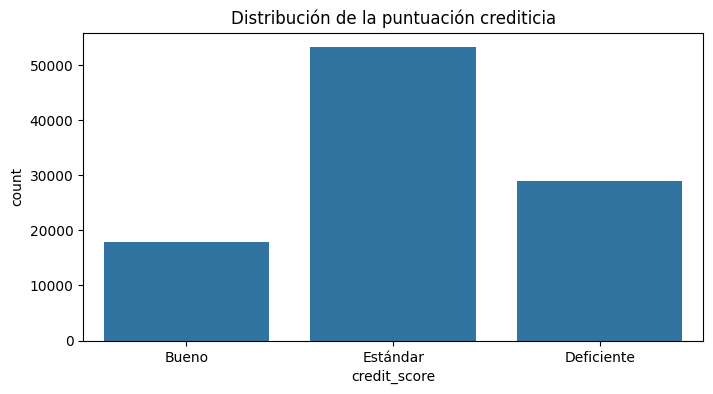

In [5]:
# Mapear los valores numéricos a etiquetas descriptivas
score_mapping = {0: 'Deficiente', 1: 'Bueno', 2: 'Estándar'}
data['credit_score'] = data['credit_score'].map(score_mapping)

#Distribución de la variable objetivo 'credit_score'
plt.figure(figsize=(8, 4))
sns.countplot(x='credit_score', data=data)
plt.title('Distribución de la puntuación crediticia')
plt.show()

El archivo muestra una serie de datos que reflejan diferentes aspectos del perfil financiero de los clientes, incluyendo su comportamiento de pago y características económicas. El objetivo de este análisis es entender la estructura del conjunto de datos para poder desarrollar un modelo de clasificación eficiente.


## Objetivos de la Modelación y Evaluación

Objetivo de la Modelación:
Buscamos desarrollar un sistema que clasifique automáticamente las puntuaciones crediticias de los clientes en tres categorías: "Deficiente", "Bueno" y "Estándar". Esto permitirá una asignación de recursos más eficiente y una mejor gestión del riesgo crediticio.

Evaluación del Modelo:
El modelo será evaluado utilizando métricas estándar en clasificación, incluyendo:

* Matriz de Confusión: Para visualizar el rendimiento del modelo en cada clase.
* Exactitud (Accuracy): Proporción de predicciones correctas.
* Precisión, Recall y F1-Score: Estas métricas ayudarán a balancear la precisión y la sensibilidad del modelo.


## Definición de clase objetivo y medida de clasificación primaria

En este caso, nos enfocamos en la clase "Deficiente" debido a nuestro interés en las personas con un historial crediticio negativo. Al priorizar esta clase en nuestras clasificaciones, buscamos que el modelo tenga resultados más robustos en su identificación.

Dado que las clases están desbalanceadas, es importante seleccionar cuidadosamente la medida principal para distinguir. En este sentido, el recall es una métrica que no se ve afectada por el desbalanceo de clases, ya que verifica la capacidad de clasificar correctamente una clase específica, sin verse influenciada por la distribución de las clases.



# Implementación de PCA

**Separación de datos**

In [6]:
data=data.dropna()

In [7]:
data.head()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno


In [8]:
y = data['credit_score'] # clases
x=data.drop('credit_score',axis=1)
print(y.shape)
print(x.shape)

(100000,)
(100000, 55)


In [9]:
y

0             Bueno
1             Bueno
2             Bueno
3             Bueno
4             Bueno
            ...    
99995    Deficiente
99996    Deficiente
99997    Deficiente
99998      Estándar
99999    Deficiente
Name: credit_score, Length: 100000, dtype: object

In [10]:
x

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,payment_of_min_amount_yes,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99996,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99997,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99998,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0


**Escalamiento de datos**

In [11]:
from sklearn.preprocessing import StandardScaler
# distribucion resultante queda con varianza igual a la unidad
sc = StandardScaler()
X_sc = sc.fit_transform(x)

**Visualización de variación explicada**

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc)
print(X_pca.shape)

(100000, 55)


In [13]:
pca.explained_variance_ratio_

array([1.49372401e-01, 5.33009602e-02, 3.42346223e-02, 2.30604790e-02,
       2.20940019e-02, 2.07843913e-02, 2.07797164e-02, 2.07792208e-02,
       2.07792208e-02, 2.07792208e-02, 2.07773233e-02, 2.07425436e-02,
       2.02336229e-02, 2.00475791e-02, 1.97871955e-02, 1.96665569e-02,
       1.96166314e-02, 1.95769238e-02, 1.95485472e-02, 1.95088516e-02,
       1.94911716e-02, 1.94851695e-02, 1.94628020e-02, 1.93977296e-02,
       1.92739246e-02, 1.90637301e-02, 1.88441003e-02, 1.80016231e-02,
       1.74097746e-02, 1.71825812e-02, 1.70170823e-02, 1.69077024e-02,
       1.66975226e-02, 1.64275502e-02, 1.63480059e-02, 1.60422901e-02,
       1.58806573e-02, 1.45938669e-02, 1.42992375e-02, 1.06355408e-02,
       9.80447813e-03, 8.74733264e-03, 8.32218539e-03, 7.62567756e-03,
       7.04553745e-03, 6.63101267e-03, 5.29921487e-03, 4.63029625e-03,
       4.07749221e-03, 3.68978110e-03, 2.59731512e-03, 1.31098519e-03,
       1.14736887e-03, 1.11031618e-03, 2.89334871e-05])

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1493724 , 0.20267336, 0.23690798, 0.25996846, 0.28206246,
       0.30284686, 0.32362657, 0.34440579, 0.36518501, 0.38596423,
       0.40674156, 0.4274841 , 0.44771772, 0.4677653 , 0.4875525 ,
       0.50721906, 0.52683569, 0.54641261, 0.56596116, 0.58547001,
       0.60496118, 0.62444635, 0.64390915, 0.66330688, 0.68258081,
       0.70164454, 0.72048864, 0.73849026, 0.75590004, 0.77308262,
       0.7900997 , 0.8070074 , 0.82370492, 0.84013247, 0.85648048,
       0.87252277, 0.88840343, 0.90299729, 0.91729653, 0.92793207,
       0.93773655, 0.94648388, 0.95480607, 0.96243175, 0.96947728,
       0.9761083 , 0.98140751, 0.98603781, 0.9901153 , 0.99380508,
       0.9964024 , 0.99771338, 0.99886075, 0.99997107, 1.        ])

**Reducción de variables**

In [15]:
from sklearn.model_selection import train_test_split
pca = PCA(n_components=0.9)
X_pca=pca.fit_transform(X_sc)
X_pca.shape


(100000, 38)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y,random_state=42)
X_train.shape

(80000, 38)

# Modelos supervisados

**Método del centroide**

In [17]:
from sklearn.neighbors import NearestCentroid
md = NearestCentroid() # 1 Creamos el modelo por default

#  2 Entrenamos
md.fit(X_train, y_train)

y_pred = md.predict(X_test) # 3 Predicciones
print("Test set predictions using Min. Dist: ",format(y_pred))

Test set predictions using Min. Dist:  ['Deficiente' 'Deficiente' 'Deficiente' ... 'Estándar' 'Bueno'
 'Deficiente']


In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, labels=['Deficiente', 'Estándar', 'Bueno'])
print(report)

              precision    recall  f1-score   support

  Deficiente       0.61      0.71      0.65      5799
    Estándar       0.83      0.53      0.64     10635
       Bueno       0.46      0.84      0.60      3566

    accuracy                           0.63     20000
   macro avg       0.63      0.69      0.63     20000
weighted avg       0.70      0.63      0.64     20000



**Interpretación del modelo**

El recall para la clase "Deficiente" es del 71%, lo que sugiere que el modelo tiene un buen desempeño en la identificación de personas con historial crediticio deficiente.

Por otro lado, el recall para la clase "Estándar" es del 53% y para la clase "Bueno" es del 84%. Esto indica que el modelo tiene un desempeño variable en la identificación de estas clases, siendo más bajo para "Estándar" y más alto para "Bueno".

Asimismo, el modelo tiene una precisión del 63% y un F1-score promedio del 63%. Lo anterior nos indica que existe un desempeño moderado en la clasificación de las diferentes clases.

**Método del clasificador**

In [19]:
from sklearn.neighbors import KNeighborsClassifier # Clasificador Scikit Learn
knn = KNeighborsClassifier(n_neighbors=3) # Hiperparametro k = 3

# 2 Entrenamiento
knn.fit(X_train, y_train)
# 3 Generar predicciones
y_pred = knn.predict(X_test)

print("Test set predictions using KNN: ",format(y_pred))

Test set predictions using KNN:  ['Estándar' 'Deficiente' 'Deficiente' ... 'Estándar' 'Bueno' 'Deficiente']


In [20]:
report = classification_report(y_test, y_pred, labels=['Deficiente', 'Estándar', 'Bueno'])
print(report)

              precision    recall  f1-score   support

  Deficiente       0.69      0.60      0.64      5799
    Estándar       0.73      0.72      0.73     10635
       Bueno       0.51      0.63      0.57      3566

    accuracy                           0.67     20000
   macro avg       0.64      0.65      0.64     20000
weighted avg       0.68      0.67      0.67     20000



**Interpretación del modelo**

El modelo tiene un rendimiento no tan bueno en la identificación de personas con historial crediticio deficiente, con un recall del 60%. En cuestión de la identificación de personas con historial "Estándar" y "Bueno", se tienen recalls del 72% y 63% respectivamente. En general, el modelo tiene una precisión del 67% y un F1-score promedio del 64%, lo que sugiere un desempeño aceptable pero con margen de mejora, especialmente en la identificación de casos de historial crediticio deficiente.

**Método del arbol**

In [21]:
from sklearn.tree import DecisionTreeClassifier # Importamos
dt = DecisionTreeClassifier() # 1.- Creamos el modelo, sin restricciones en el árbol

dt.fit(X_train, y_train) # 2.- Entrenamos

# 3.- Predicciones
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)


In [22]:
y_test_pred

array(['Deficiente', 'Deficiente', 'Deficiente', ..., 'Estándar', 'Bueno',
       'Estándar'], dtype=object)

In [23]:
y_train_pred

array(['Estándar', 'Estándar', 'Estándar', ..., 'Deficiente', 'Estándar',
       'Estándar'], dtype=object)

In [24]:
y_test_pred = dt.predict(X_test)

report = classification_report(y_test, y_test_pred, labels=['Deficiente', 'Estándar', 'Bueno'])
print(report)

              precision    recall  f1-score   support

  Deficiente       0.67      0.66      0.66      5799
    Estándar       0.73      0.73      0.73     10635
       Bueno       0.64      0.64      0.64      3566

    accuracy                           0.69     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.69      0.69      0.69     20000



**Interpretación del modelo**

En nuestro modelo del árbol, el recall para cada clase es del 66% para "Deficiente", 73% para "Estándar" y 63% para "Bueno". Esto indica que el modelo tiene un desempeño bastante consistente en la identificación de instancias de cada clase.  Hablando de otras métrcias, el modelo tiene una precisión del 69% y un F1-score promedio del 67%, lo que indica un desempeño relativamente sólido en la clasificación de las diferentes clases.

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC # Support Vector Classifier

std_scl = StandardScaler()
svc = SVC(kernel='linear', C=100) # tipo de kernel, C: [Soft...C...Hard]

svc_clf = make_pipeline(std_scl, svc) # defino la secuencia de izq a der

In [26]:
#from sklearn.metrics import accuracy_score

#svc_clf.fit(X_train, y_train) # Entrenamos

# Predicciones
#y_test_pred = svc_clf.predict(X_test)
#y_train_pred = svc_clf.predict(X_train)



In [27]:
#y_test_pred

In [28]:
#y_train_pred

# Modelos no supervisados

In [29]:
data

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,Deficiente
99996,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,Deficiente
99997,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,Deficiente
99998,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,Estándar


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               100000 non-null  int64  
 1   annual_income                     100000 non-null  float64
 2   monthly_inhand_salary             100000 non-null  float64
 3   num_bank_accounts                 100000 non-null  int64  
 4   num_credit_card                   100000 non-null  int64  
 5   interest_rate                     100000 non-null  int64  
 6   num_of_loan                       100000 non-null  int64  
 7   delay_from_due_date               100000 non-null  int64  
 8   num_of_delayed_payment            100000 non-null  int64  
 9   changed_credit_limit              100000 non-null  float64
 10  num_credit_inquiries              100000 non-null  int64  
 11  outstanding_debt                  100000 non-null  fl

In [31]:
# credit score int64
credit_score_mapping = {'Deficiente': 0, 'Bueno': 1, 'Estándar': 2}
data['credit_score'] = data['credit_score'].map(credit_score_mapping)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               100000 non-null  int64  
 1   annual_income                     100000 non-null  float64
 2   monthly_inhand_salary             100000 non-null  float64
 3   num_bank_accounts                 100000 non-null  int64  
 4   num_credit_card                   100000 non-null  int64  
 5   interest_rate                     100000 non-null  int64  
 6   num_of_loan                       100000 non-null  int64  
 7   delay_from_due_date               100000 non-null  int64  
 8   num_of_delayed_payment            100000 non-null  int64  
 9   changed_credit_limit              100000 non-null  float64
 10  num_credit_inquiries              100000 non-null  int64  
 11  outstanding_debt                  100000 non-null  fl

In [33]:
# Seleccionar columnas numéricas para el clustering
data_numeric = data.select_dtypes(include=[np.number])
data_numeric

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99996,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99997,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,0
99998,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,1,1,0,0,0,0,0,0,2


In [34]:
data_numeric[:10]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
5,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
6,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,1
7,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,2
8,28,34847.84,3037.9867,2,4,6,1,3,1,5.42,...,0,0,0,1,0,0,0,0,0,2
9,28,34847.84,3037.9867,2,4,6,1,3,1,5.42,...,0,0,0,1,0,0,0,0,0,1


In [35]:
import pandas as pd
data_numeric = data_numeric.dropna()
data_numeric = data_numeric.fillna(data_numeric.mean())

In [36]:
import matplotlib.pyplot as plt
sns.scatterplot(data=data_numeric)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [37]:
from sklearn.cluster import KMeans # importamos KMeans
#Inercia
km1 = KMeans(n_clusters = 3, init='k-means++') # Crear el modelo
km1.fit(data_numeric) # ajuste sus parametros (aprendizaje) con respecto a X
print(km1.inertia_) # Sum of squared distances to the closest centroid
# Mas pequeño el valor, mas cercanos entre si --> clusters mas compactos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18104627563099.516


In [ ]:
# Elbow method: para evaluar el k óptimo
inertias = []
for i in range(1, 21):
  km = KMeans(n_clusters = i, init='k-means++')
  km.fit(data_numeric)
  inertias.append(km.inertia_)

# Grafica de las inercias: suma de distancias al cuadrado
plt.plot(range(1,21), inertias)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.axvline(3, color='k', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Creamos el K-means para los 3 clusters encontrados
km = KMeans(n_clusters=3, init='k-means++') # kmeans++: acelera la convergencia
y_kmeans = km.fit_predict(data_numeric)
y_kmeans

In [ ]:
km.cluster_centers_

In [ ]:
import matplotlib.pyplot as plt
# Visualización de los clusters
plt.scatter(data_numeric.iloc[:, 0], data_numeric.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Clusters of coustomers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='yellow', label='Centroids', s=100, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters of data')
plt.legend()
plt.show()


In [ ]:
silhouettes = []
for i in range(2, 11):
    km = KMeans(n_clusters = i, init='k-means++')
    km.fit(data_numeric)
    silhouettes.append(silhouette_score(data_numeric, km.labels_))
plt.plot(range(2,11), silhouettes, marker='o')
plt.title('Silhouette scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.axvline(4, color='k', linestyle='--')
plt.axvline(2, color='k', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

Solucion: k=5 porque la inercia es mejor (menor) y score silhouette es "bueno".:

In [ ]:
# Creamos el K-means para los 5 clusters encontrados
km = KMeans(n_clusters=5, init='k-means++') # kmeans++: acelera la convergencia
y_kmeans = km.fit_predict(data_numeric)
y_kmeans

In [ ]:
import matplotlib.pyplot as plt
# Visualización de los clusters
plt.scatter(data_numeric.iloc[:, 0], data_numeric.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Clusters of coustomers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='yellow', label='Centroids', s=100, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters of data')
plt.legend()
plt.show()

### DBScan

In [ ]:
#empezamos a hacer un algoritmo nuevo de aprendizaje no supervisado con el algoritmo de dbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5) # epsilon-vecindad, num puntos
dbscan.fit(X) # No hay predict